# Chapter 2: Optimization: Principles and Algorithms

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= \frac{1}{2} x_1^2 + 2 x_2^2\\]

It corresponds to the example 2.14 in the book 
Bierlaire (2015) Optimization: principles and algorithms, EPFL Press.

Its gradient is \\[ \nabla f(x) = \left(\begin{array}{c}x_1 \\ 4 x_2 \end{array}\right)\\]

In [2]:
import numpy as np
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = None
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right)\\]

In [3]:
x = np.array([1, 1])
f, g, h = ex0214(x)

In [4]:
print(f)

2.5


In [5]:
print(g)

[1. 4.]


In order to plot the function, we do not need the gradient. 
Therefore, we wrap the above function in another function fct 
that returns only the value of the function.

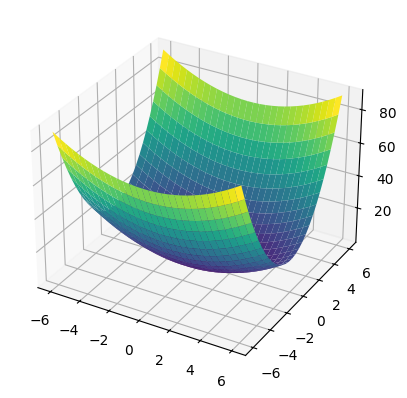

In [6]:
def fct(x, y):
    f,_ , _ = ex0214(np.array([x, y]))
    return f

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

We investigate the shape of the function along several directions.
We define three directions.

In [7]:
d1 = -g
d2 = np.array([-1, -1])
d3 = np.array([1, -3])

We plot the function along the three directions

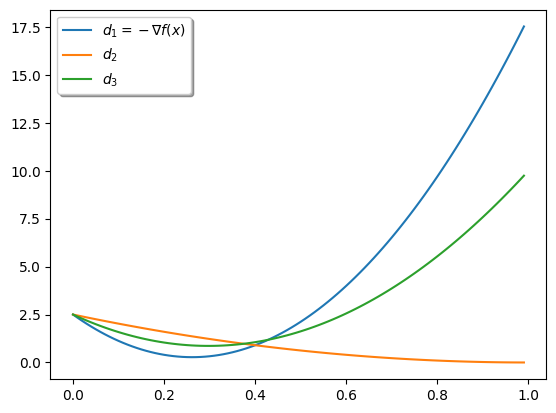

In [8]:
plotalpha = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex0214(x + alpha * d1)[0] for alpha in plotalpha])
fx2 = np.array([ex0214(x + alpha * d2)[0] for alpha in plotalpha])
fx3 = np.array([ex0214(x + alpha * d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha,
                               fx1,
                               plotalpha,
                               fx2,
                               plotalpha,
                               fx3)
ax.legend((plot1,plot2,plot3),
          ('$d_1=-\\nabla f(x)$', '$d_2$', '$d_3$'), \
              loc='upper left', shadow=True)

Calculate the directional derivatives of $f$ at $x$ along each direction.

Along d1: -17.0 

Along d2: -5.0

Along d3: -11.0

Graphical visualization of above problem

In [9]:
ex0214(x0)

NameError: name 'x0' is not defined

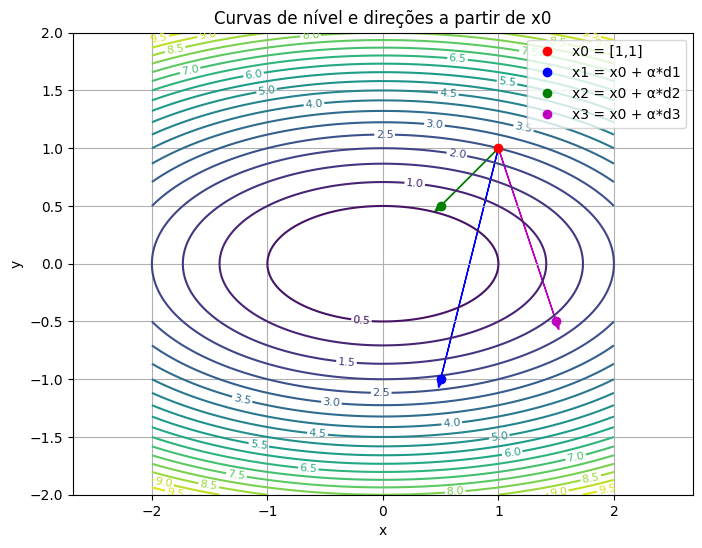

In [37]:
# Parameters
x0 = np.array([1.0, 1.0])
_, g, _ = ex0214(x0)
alpha = 0.5

# Directions
d1 = -g
d2 = np.array([-1.0, -1.0])
d3 = np.array([1.0, -3.0])

# New points after step
x1 = x0 + alpha * d1
x2 = x0 + alpha * d2
x3 = x0 + alpha * d3

# Grid for contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * X**2 + 2.0 * Y**2

# Plotting
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot initial and resulting points
plt.plot(x0[0], x0[1], 'ro', label='x0 = [1,1]')
plt.plot(x1[0], x1[1], 'bo', label='x1 = x0 + α*d1')
plt.plot(x2[0], x2[1], 'go', label='x2 = x0 + α*d2')
plt.plot(x3[0], x3[1], 'mo', label='x3 = x0 + α*d3')

# Arrows for directions
plt.arrow(x0[0], x0[1], alpha * d1[0], alpha * d1[1], color='b', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d2[0], alpha * d2[1], color='g', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d3[0], alpha * d3[1], color='m', head_width=0.05)

plt.title('Curvas de nível e direções a partir de x0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Example 2.23 (Curvature). The curvature of the function in different directions is given below


In [ ]:
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = np.array([[1.0, 0.0], [0.0, 4.0]])
    return f, g, h

x = np.array([1, 1])
f, g, h = ex0214(x)

In [ ]:
d = np.array([1, 4])
(d @ h @ d) / (d @ d)

In [ ]:
d = np.array([1,1])
(d @ h @ d) / (d @ d)

In [ ]:
d = np.array([-1,3])
(d @ h @ d) / (d @ d)

Example 2.31 (Conditioning). The quadratic function

In [ ]:
def ex0231(x):
    f = 2.0*x[0]**2 + 9.0*x[1]**2
    g = np.array([4.0*x[0], 18.0*x[1]])
    h = np.array([[4.0, 0.0], [0.0, 18.0]])
    return f, g, h
x0 = np.array([0., 0.])
_, _, h = ex0231(x0)

In [ ]:
# Compute the singular values
singular_values = np.linalg.svd(h, compute_uv=False)

# Compute the condition number as sigma_1 / sigma_n
condition_number = singular_values[0] / singular_values[-1]
condition_number

In [ ]:
# Applying change of variables
def ex0231_b(x):
    f = 0.5*x[0]**2 + 0.5*x[1]**2
    g = np.array([1.0*x[0], 1.0*x[1]])
    h = np.array([[1.0, 0.0],[0.0, 1.0]])
    return f, g, h

_, _, h = ex0231_b(x0)
singular_values = np.linalg.svd(h, compute_uv=False)
condition_number = singular_values[0] / singular_values[-1]
condition_number

In [ ]:
# Original function
def f_original(x1, x2):
    return 2.0 * x1**2 + 9.0 * x2**2

# Transformed function (after variable substitution)
def f_transformed(x1p, x2p):
    return 0.5 * x1p**2 + 0.5 * x2p**2

# Grid for plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Original function contours
Z_orig = f_original(X, Y)

# Change of variables
X1p = 2 * X
X2p = 3 * np.sqrt(2) * Y

# Transformed function contours
Z_transf = f_transformed(X1p, X2p)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Original function: $f(x_1, x_2) = 2x_1^2 + 9x_2^2$")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].axis('equal')
axs[0].grid(True)

# Transformed
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Transformed function: $f(x_1', x_2') = \\frac{1}{2}x_1'^2 + \\frac{1}{2}x_2'^2$")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Ponto inicial
x0 = np.array([2.0, 2.0])  # mesmo ponto de partida nos dois casos
alpha = 0.1  # passo fixo
n_steps = 20  # número de iterações

# Gradiente da função original
def grad_f_original(x):
    return np.array([4.0 * x[0], 18.0 * x[1]])

# Caminho de gradiente descendente para função original
x_orig = [x0.copy()]
x = x0.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_original(x)
    x_orig.append(x.copy())
x_orig = np.array(x_orig)

# Mudança de coordenadas: x' = T x
T = np.array([[2.0, 0.0], [0.0, 3.0 * np.sqrt(2)]])
T_inv = np.linalg.inv(T)

# Caminho transformado: em coordenadas x'
x0p = T @ x0
def grad_f_transf(xp):
    return np.array([xp[0], xp[1]])  # gradiente da função esférica 0.5 x'^T x'

x_transf = [x0p.copy()]
x = x0p.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_transf(x)
    x_transf.append(x.copy())
x_transf = np.array(x_transf)

# Curvas de nível para plotagem
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_orig = f_original(X, Y)
Z_transf = f_transformed(X, Y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(x_orig[:, 0], x_orig[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# Transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(x_transf[:, 0], x_transf[:, 1], 'bo-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# It corresponds to the 4 function in Exercise 2.2 in the book.

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x_1, x_2) = x_1^2 + 2x_1 x_2 + 2x_2^2\\]

Its gradient is \\[ \nabla f(x) = 
\begin{bmatrix}
2x_1 + 2x_2 \\
2x_1 + 4x_2
\end{bmatrix}.\\]

Its hessian is \\[ \nabla^2 f(x) = 
\begin{bmatrix}
2 & 2 \\
2 & 4
\end{bmatrix}.\\]

In [39]:
import numpy as np
def function4(x):
    f = x[0]**2 + 2 * x[0] * x[1] + 2 * x[1]**2
    g = np.array([ 2 * x[0] + 2 * x[1], 2 * x[0] + 4 * x[1]])
    h = np.array([[2 , 2], [2, 4]])
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).\\]

In [12]:
x = np.array([1, 1])
f, g, h = function4(x)

In [13]:
print(f)

5


In [14]:
print(g)

[4 6]


In [15]:
print(h)

[[2 2]
 [2 4]]


To plot the function, we first import the libraries.

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Then we write a wrapper that returns only the value of the function.

In [17]:
def fplot(x, y):
    npx = np.array([x, y])
    return function4(npx)[0]

Finally, we plot the function for a range of values of $x_1$ and $x_2$.

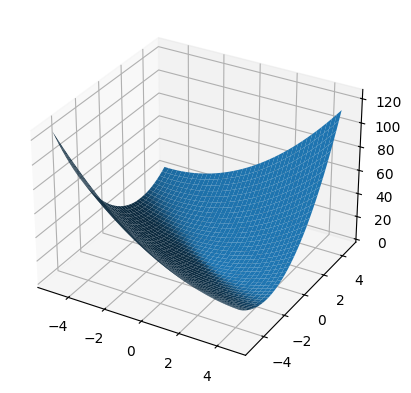

In [18]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Consider the direction \\[ d = \left(\begin{array}{c} -1 \\ -1 \end{array} \right), \\]
and \\[ g(\alpha) = f(x+ \alpha d),\\] the one-dimensional function from $x$ along $d$.

In [19]:
d = np.array([-1, -1])
def onedimension(alpha):
    thex = x + alpha * d
    return function4(thex)[0]

Plot that function.

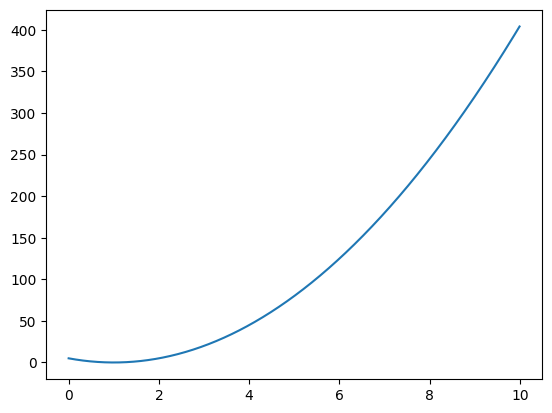

In [20]:
plotalpha = np.arange(0, 10, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

The directional derivative is $\nabla f(x)^T d$, where $x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).$

In [21]:
print(np.inner(g, d))

-10


The curvature is \\[\frac{d^T H d}{d^T d},\\] where $x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).$

In [22]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [23]:
print(curvature(h, d))

5.0


Calculate the eigenvalues and eigenvectors.

In [24]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)
eigenvalues


array([0.76393202, 5.23606798])

In [25]:
eigenvectors

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

The curvature along the eigenvectors are the eigenvalues.

In [26]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

4.341640786499873
1.6583592135001266


In [27]:
def function4(x):
    f = x[0]**2 + 2 * x[0] * x[1] + 2 * x[1]**2
    g = np.array([ 2 * x[0] + 2 * x[1], 2 * x[0] + 4 * x[1]])
    h = np.array([[2 , 2], [2, 4]])
    return f, g, h
x0 = np.array([0., 0.])
_, _, h = function4(x0)

In [28]:
# Compute the singular values
singular_values = np.linalg.svd(h, compute_uv=False)

# Compute the condition number as sigma_1 / sigma_n
condition_number = singular_values[0] / singular_values[-1]
condition_number

6.854101966249685

In [29]:
# Applying change of variables
def function4_b(x):
    # Calcula o valor da função f(z1, z2)
    f = ((5 - np.sqrt(5)) / 20) * x[0]**2 + ((np.sqrt(5) - 5) / 10) * x[0] * x[1] + 0.5 * x[1]**2
    
    # Calcula o gradiente (derivadas parciais)
    g = np.array([
        ((5 - np.sqrt(5)) / 10) * x[0] + ((np.sqrt(5) - 5) / 10) * x[1],  # ∂f/∂z1
        ((np.sqrt(5) - 5) / 10) * x[0] + x[1]                             # ∂f/∂z2
    ])
    
    # Calcula a hessiana (matriz de derivadas segundas)
    h = np.array([
        [(5 - np.sqrt(5)) / 10, (np.sqrt(5) - 5) / 10],  # ∂²f/∂z1² e ∂²f/∂z1∂z2
        [(np.sqrt(5) - 5) / 10, 1.0]                      # ∂²f/∂z2∂z1 e ∂²f/∂z2²
    ])
    
    return f, g, h

_, _, h = function4_b(x0)
singular_values = np.linalg.svd(h, compute_uv=False)
condition_number = singular_values[0] / singular_values[-1]
condition_number

5.97863579633264

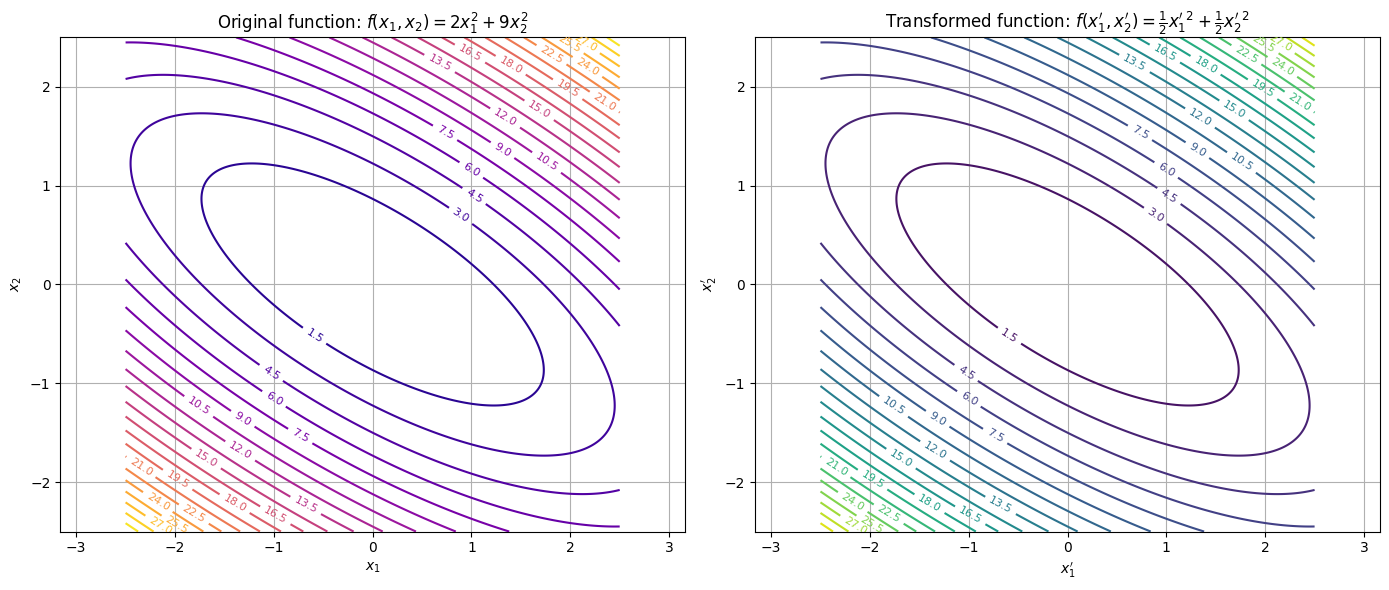

In [32]:
# Original function
def f_original(x1, x2):
    return x1**2 + 2 * x1 * x2 + 2 * x2**2

# Transformed function (after variable substitution)
def f_transformed(x1p, x2p):
    return ((5 - np.sqrt(5)) / 20) * x1p**2 + ((np.sqrt(5) - 5) / 10) * x1p * x2p + 0.5 * x2p**2

# Grid for plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Original function contours
Z_orig = f_original(X, Y)

# Change of variables

sqrt2 = np.sqrt(2)
sqrt10 = np.sqrt(10)
    
# Coeficientes do sistema original (x em função de z)
coef_z1_x1 = - (sqrt2/4 + sqrt10/20)  # Coeficiente de z1 em x1
coef_z2_x1 = sqrt10 / 10              # Coeficiente de z2 em x1
coef_z1_x2 = sqrt2/4 - sqrt10/20      # Coeficiente de z1 em x2
coef_z2_x2 = sqrt10 / 10              # Coeficiente de z2 em x2
    
# Monta a matriz do sistema A * z = x
A = np.array([
        [coef_z1_x1, coef_z2_x1],
        [coef_z1_x2, coef_z2_x2]
])
    
# Calcula a inversa de A para resolver z = A⁻¹ * x
A_inv = np.linalg.inv(A)
    
# Coeficientes para z1 e z2 em função de x1 e x2
coef_x1_z1 = A_inv[0, 0]  # Coeficiente de x1 em z1
coef_x2_z1 = A_inv[0, 1]  # Coeficiente de x2 em z1
coef_x1_z2 = A_inv[1, 0]  # Coeficiente de x1 em z2
coef_x2_z2 = A_inv[1, 1]  # Coeficiente de x2 em z2
    
# Calcula z1 e z2
X1p = coef_x1_z1 * X + coef_x2_z1 * Y
X2p= coef_x1_z2 * X + coef_x2_z2 * Y

# Transformed function contours
Z_transf = f_transformed(X1p, X2p)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Original function: $f(x_1, x_2) = 2x_1^2 + 9x_2^2$")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].axis('equal')
axs[0].grid(True)

# Transformed
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Transformed function: $f(x_1', x_2') = \\frac{1}{2}x_1'^2 + \\frac{1}{2}x_2'^2$")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

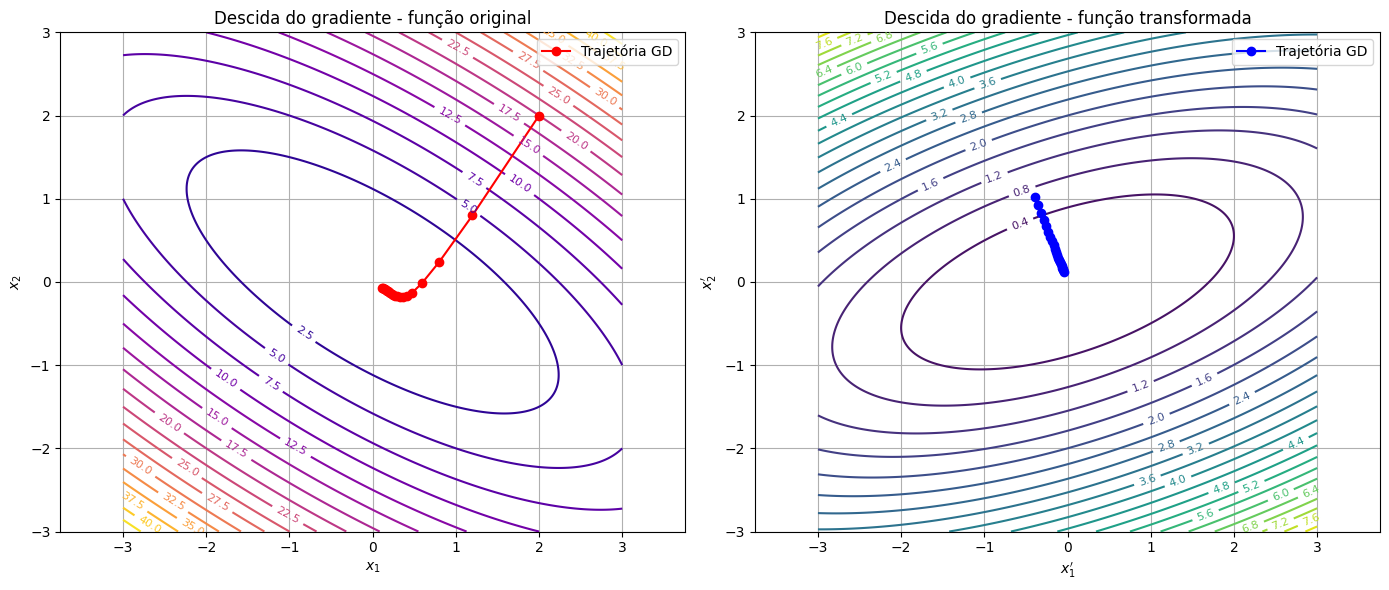

In [33]:
# Ponto inicial
x0 = np.array([2.0, 2.0])  # mesmo ponto de partida nos dois casos
alpha = 0.1  # passo fixo
n_steps = 20  # número de iterações

# Gradiente da função original
def grad_f_original(x):
    return np.array([ 2 * x[0] + 2 * x[1], 2 * x[0] + 4 * x[1]])

# Caminho de gradiente descendente para função original
x_orig = [x0.copy()]
x = x0.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_original(x)
    x_orig.append(x.copy())
x_orig = np.array(x_orig)

# Mudança de coordenadas: x' = T x
T = np.array([
    [-np.sqrt(2)/4 - np.sqrt(10)/20, np.sqrt(10)/10],
    [ np.sqrt(2)/4 - np.sqrt(10)/20, np.sqrt(10)/10]
])

T_inv = np.linalg.inv(T)

# Caminho transformado: em coordenadas x'
x0p = T @ x0
def grad_f_transf(xp):
    return np.array([xp[0], xp[1]])  # gradiente da função esférica 0.5 x'^T x'

x_transf = [x0p.copy()]
x = x0p.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_transf(x)
    x_transf.append(x.copy())
x_transf = np.array(x_transf)

# Curvas de nível para plotagem
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_orig = f_original(X, Y)
Z_transf = f_transformed(X, Y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(x_orig[:, 0], x_orig[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# Transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(x_transf[:, 0], x_transf[:, 1], 'bo-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# It corresponds to the 5 function in Exercise 2.2 in the book.

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x_1, x_2) = x_1^2 - x_1x_2 + 2x_2^2 - 2x_1 + e^{x_1 + x_2}\\]